# Actividad Evaluable: Exploración de Datos: Análisis Estadístico - Mapas de calor y boxplots

Recopilación de Datos Iniciales

In [8]:
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
diabetes=pd.read_csv("diabetes.csv")

Descripción de los datos:

In [5]:
dim=diabetes.shape
print("Son "+str(dim[0])+" Filas\n"+"Son: "+str(dim[1])+" Columnas")

Son 768 Filas
Son: 9 Columnas


Hay 9 variables de los cuales cada uno cuenta con 768 datos dentro.

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print("Pregnancies: Es de tipo cuantitativo discreto")
print("Glucose: Es de tipo cuantitativo discreto")
print("BloodPresssure: Es de tipo cuantitativo discreto")
print("SkinThickness: Es de tipo cuantitativo discreto")
print("Insulin: Es de tipo cuantitativo discreto")
print("BMI: Es de tipo cuantitativo continuo")
print("DPF: Es de tipo cuantitativo continuo")
print("Age: Es de tipo cuantitativo discreto")
print("Age: Es de tipo cualitativo nominal")

Pregnancies: Es de tipo cuantitativo discreto
Glucose: Es de tipo cuantitativo discreto
BloodPresssure: Es de tipo cuantitativo discreto
SkinThickness: Es de tipo cuantitativo discreto
Insulin: Es de tipo cuantitativo discreto
BMI: Es de tipo cuantitativo continuo
DPF: Es de tipo cuantitativo continuo
Age: Es de tipo cuantitativo discreto
Age: Es de tipo cualitativo nominal


    Pregnancies: Numero de veces embarazada.
    Glucose: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral.
    BloodPressure: Presión arterial diastólica (mm Hg).
    SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
    Insulin: 2-Hour serum inbsulin (mu U/ml).
    BMI: Indice de masa corporal (kg/m^2).
    DPF: 
    Age: Edad del paciente.
    Outcome: Variable de valores entre 0 y 1.

In [15]:
colm=diabetes.columns.values
for i in colm:
    print(i,":")
    print("-"*20)
    print(diabetes[i].dtypes)
    print("Máximo en:",diabetes[i].max())
    print("Minimo en:",diabetes[i].min())
    print("-"*20)

Pregnancies :
--------------------
int64
Máximo en: 17
Minimo en: 0
--------------------
Glucose :
--------------------
int64
Máximo en: 199
Minimo en: 0
--------------------
BloodPressure :
--------------------
int64
Máximo en: 122
Minimo en: 0
--------------------
SkinThickness :
--------------------
int64
Máximo en: 99
Minimo en: 0
--------------------
Insulin :
--------------------
int64
Máximo en: 846
Minimo en: 0
--------------------
BMI :
--------------------
float64
Máximo en: 67.1
Minimo en: 0.0
--------------------
DiabetesPedigreeFunction :
--------------------
float64
Máximo en: 2.42
Minimo en: 0.078
--------------------
Age :
--------------------
int64
Máximo en: 81
Minimo en: 21
--------------------
Outcome :
--------------------
int64
Máximo en: 1
Minimo en: 0
--------------------


In [ ]:
cantdia=0
for i in range(0,len(diabetes[colm[-1]])):
    if diabetes[colm[-1]][i]==1:
        cantdia+=1
print ("Personas con diabetes:",cantdia)
print ("Personas sin diabetes:",(len(diabetes[colm[-1]])-cantdia))

Exploración de datos (Media, mediana)

In [7]:
colm=diabetes.columns.values
for i in colm:
    if i!=colm[-1]: #Caso particular: col. final. No categorica
        print(i,":")
        print("-"*40)
        print("Media:",diabetes[i].mean())
        print("Mediana:",diabetes[i].median())
        print("Desviación Estandar:",diabetes[i].std())
        print("-"*40)

Pregnancies :
----------------------------------------
Media: 3.8450520833333335
Mediana: 3.0
Desviación Estandar: 3.3695780626988623
----------------------------------------
Glucose :
----------------------------------------
Media: 120.89453125
Mediana: 117.0
Desviación Estandar: 31.97261819513622
----------------------------------------
BloodPressure :
----------------------------------------
Media: 69.10546875
Mediana: 72.0
Desviación Estandar: 19.355807170644777
----------------------------------------
SkinThickness :
----------------------------------------
Media: 20.536458333333332
Mediana: 23.0
Desviación Estandar: 15.952217567727677
----------------------------------------
Insulin :
----------------------------------------
Media: 79.79947916666667
Mediana: 30.5
Desviación Estandar: 115.24400235133837
----------------------------------------
BMI :
----------------------------------------
Media: 31.992578124999977
Mediana: 32.0
Desviación Estandar: 7.8841603203754405
------------

Visualización de datos:

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

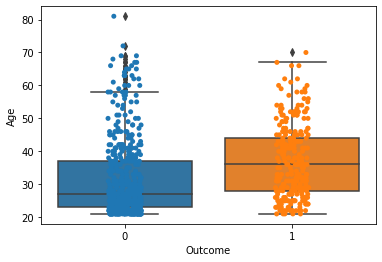

In [9]:
sns.boxplot(x="Outcome", y="Age", data=diabetes)
sns.stripplot(x="Outcome", y="Age",data=diabetes, jitter=True,
                edgecolor="gray")

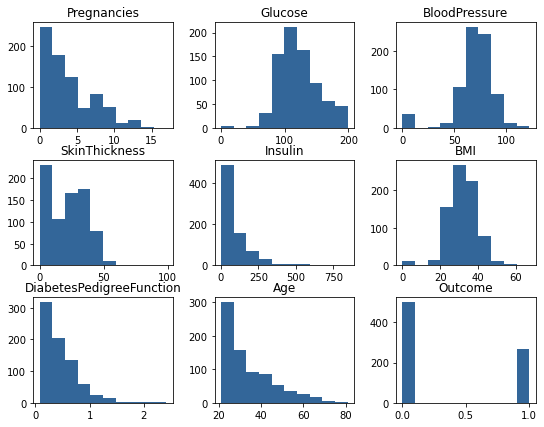

In [12]:
diabetes.hist(bins=10,figsize=(9,7),grid=False, color=['#336699']);|

<AxesSubplot:>

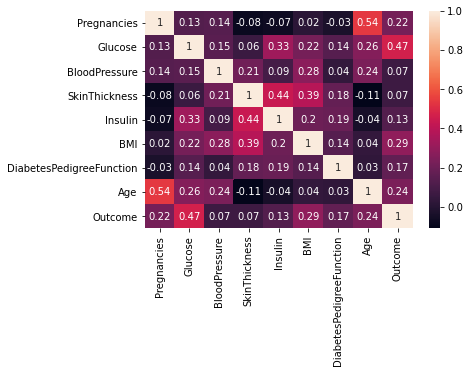

In [13]:
corr_mat=diabetes.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

De acuerdo con NIH, Existen diversos factores para la terminación de la diabetes, en estos se detallan la insulina, el BMI, los antecedentes familiares (DPF), la edad, presión arterial, la glucosa y si es que esta persona dio a luz a un bebé que pesó mas de 9 libras, también otro estudio encontró que existe cierta relación entre el espesor de la piel en personas con diabetes, mostrando que este es mayor.

#### ¿Hay alguna variable que no aporta información?
De acuerdo con el mapa de calor, se encuentra una baja relación entre si la persona es diabética (Outcome) con respecto a la presión sanguínea y el espesor de la piel por lo que, se puede determinar que no tienen impacto, o menor impacto.

#### Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
Eliminaría la presión sanguinea y el espesor de piel ya que estos valores no generan un gran impacto en la determinación de diabetes de una persona.

#### ¿Existen variables que tengan datos extraños?
El DPF contiene valores extraños puesto que, los valores son continuos además de que no varían entre 0 y 1 por lo que no se puede determinar el significado de estos datos.

#### Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
no, los rangos son diferentes para la mayoría de las variables y aunque estos valores tengan el mismo rango, no considero que exista un problema ya que cada variable cuenta con un peso ponderado en la determinación de la diabetes.

#### ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
Que se parezcan como tal no, pero la edad parece tener una gran relación con la cantidad de embarazos, con una correlación de 0.54.

Referencias:
    https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/informacion-general/factores-riesgo-tipo-2
    
    https://www.hormone.org/pacientes-y-cuidadores/la-diabetes-e-insulina#:~:text=La%20insulina%20es%20una%20hormona,llamado%20resistencia%20a%20la%20insulina).
    https://medlineplus.gov/spanish/ency/article/001214.htm#:~:text=Se%20diagnostica%20diabetes%20si%20el,para%20la%20diabetes%20tipo%202.
    
    http://www.enfermeriaaps.com/portal/?wpfb_dl=4256
    
    https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity